## kNN Classification
##### Case Study 3

---
> 1. Distance between 2 points

In [2]:
import numpy as np
p1 = np.array([1,1])
p2 = np.array([4,4])

print("p2-p1 = ", p2 - p1)
print("powered = ", np.power(p2 - p1, 2))   # return [(x2-x1)^2, (y2-y1)^2]
print("distance between p2 & p2 = ", np.sqrt(np.sum(np.power(p2-p1, 2))))

p2-p1 =  [3 3]
powered =  [9 9]
distance between p2 & p2 =  4.242640687119285


In [3]:
import numpy as np
def distance(p1, p2):
    """Find the distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [4]:
p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.242640687119285

---
> 2. Majority Vote

In [5]:
def majority_vote(votes):
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts

In [6]:
votes = [1,2,3,1,2,3,1,2,2,3,2,3,3]
vote_counts = majority_vote(votes)
vote_counts

{1: 3, 2: 5, 3: 5}

>Given a dictionary where the values are counts, how to return the key that corresponds to largest value?

In [7]:
print( max(vote_counts) )          # notice it only return the last entry who has the largest value
print( max(vote_counts.keys()) )   # same here, lost the previous enteries
print( max(vote_counts.values()) )   
max_count = max( vote_counts.values() )

3
3
5


>Use items() method of dictionary to loop over the dict and find maximum entrie

In [8]:
for vote, count in vote_counts.items():
    print(vote, count)

1 3
2 5
3 5


> Make into a function

In [9]:
import random

def majority_vote(votes):
    """Return the most common element in votes"""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_count = max( vote_counts.values() )
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    
    return random.choice(winners)

In [10]:
votes = [1,2,3,1,2,3,1,2,2,3,2,3,3]
majority_vote(votes)

3

> Use `scipy.stats.mstats.mode()` function to simplify the code: find the mode in numpy array. 
>
> But this method only retrun the first entry that find has largest value

In [11]:
import scipy.stats as ss

def majority_vote_short(votes):
    """Return the most common element in votes"""
    mode, count =  ss.mstats.mode(votes)
    return mode

In [12]:
votes = [1,2,3,1,2,3,1,2,2,3,2,3,3]
majority_vote_short(votes)  # always return 2 in this example

array([2.])

---
> 3. Find Nearest Neighbor

Steps
1. loop over all points
2. compute the distance between point p and every other point during the loop
3. sort distances and return k points that are nearest to point p

In [13]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5, 2])
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])
print(points.shape)

(9, 2)


> Loop over all points and get distances

In [14]:
distances = np.zeros(points.shape[0]) # array to save distances between p to each point in points
print( points.shape[0] == len(distances) )
for i in range(len(distances)):
    distances[i] = distance(p, points[i])   
    # loop all points and get distance between p and another point

print( distances )
print( points[4] )
print( distances[4] )
print( points[7] )
print( distances[7] )

True
[1.80277564 1.5        1.80277564 1.11803399 0.5        1.11803399
 1.11803399 0.5        1.11803399]
[2 2]
0.5
[3 2]
0.5


> Get sorted distances with `numpy.argsort()` method

In [15]:
ind = np.argsort(distances) # sort the array and returns sorted index, original array not changed
print( ind )  
print( distances )
print( distances[ind])
print( distances[ind[0:2]])

[4 7 3 5 6 8 1 0 2]
[1.80277564 1.5        1.80277564 1.11803399 0.5        1.11803399
 1.11803399 0.5        1.11803399]
[0.5        0.5        1.11803399 1.11803399 1.11803399 1.11803399
 1.5        1.80277564 1.80277564]
[0.5 0.5]


> Make it to function

In [16]:
def find_nearest_neighbors(p, points, k=5):  # default k=5
    """Find the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0]) 
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])  
    ind = np.argsort(distances)    
    return ind[:k]   # same with ind[0:k]

In [17]:
ind = find_nearest_neighbors(p, points, 3)
print( points[ind] )

[[2 2]
 [3 2]
 [2 1]]


> Use kNN to predict which class the point belongs to

In [18]:
def knn_predict(p, points, outcomes, k=5):
    # find k nearest neighbors
    ind = find_nearest_neighbors(p, points, k)
    # predict the class or category of p based on majority vote
    return majority_vote(outcomes[ind])

In [19]:
outcomes = np.array(["M","M","M","M","F","F","F","F","F"])
len(outcomes) == points.shape[0]

True

In [20]:
knn_predict(np.array([2.5,2.7]), points, outcomes, k=2)

'F'

In [21]:
knn_predict(np.array([1,2.7]), points, outcomes, k=2)

'M'

---
> 4. Generate Synthetic Data

In [22]:
import scipy.stats as ss
print (np.concatenate(( ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2)) ), axis=0) )
print(np.concatenate(( np.repeat("M", 5), np.repeat("F",5))) )

[[ 1.74580757 -0.96349753]
 [ 0.00797128 -1.4909478 ]
 [-0.2551327   0.70397396]
 [-0.2095543  -0.70553197]
 [ 0.62418315  0.65564986]
 [-0.01650894  1.28140511]
 [ 1.51565028 -0.55755915]
 [ 0.20423428  1.41871183]
 [ 1.57809923  2.45799064]
 [-0.06979417  2.56549673]]
['M' 'M' 'M' 'M' 'M' 'F' 'F' 'F' 'F' 'F']


> Final Function

In [23]:
import scipy.stats as ss
def generate_synth_date(n=50):
    """Create 2 sets of points from bivariate normal distributions"""
    points = np.concatenate(( ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2)) ), axis=0)
    outcomes = np.concatenate(( np.repeat(0, n), np.repeat(1,n)))
    return (points, outcomes)

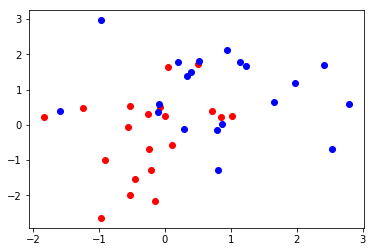

In [24]:
n = 20
(points, outcomes) = generate_synth_date(n)
plt.figure()
plt.plot(points[:n, 0], points[:n, 1], "ro")
plt.plot(points[n:, 0], points[n:, 1], "bo")

--- 
> 5. Make Prediction Grid and Plot it

In [25]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid. """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

In [26]:
seasons = ["spring", "summer", "fall", "winter"]
for ind, season in enumerate(seasons):
    print(ind, season)

0 spring
1 summer
2 fall
3 winter


In [27]:
# Provided from outsource
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [28]:
(predictors, outcomes) = generate_synth_date()
predictors.shape

(100, 2)

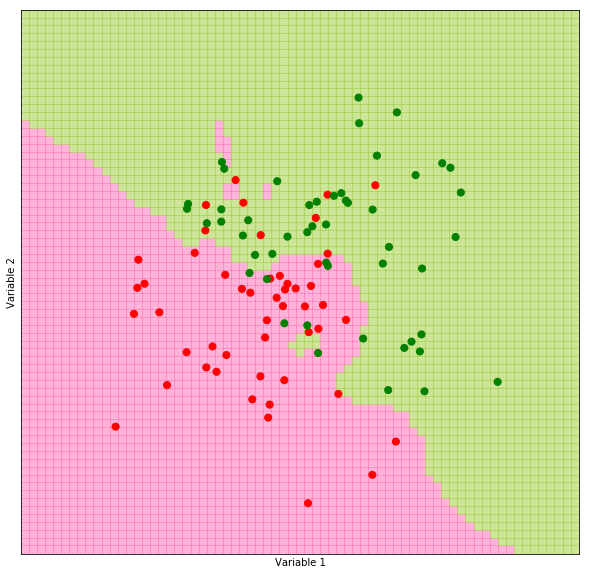

In [29]:
k=5
filename="knn_synth_5.pdf"
limits=(-3, 4, -3, 4)
h= 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

---
> 6. Apply the kNN Method

SciKitLearn is an open source machine learning library

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


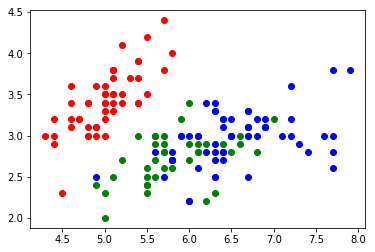

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
print(type(iris["data"]))

predictors = iris.data[:, 0:2]
outcomes = iris.target
print(outcomes)

plt.plot(predictors[outcomes==0][:, 0], predictors[outcomes==0][:, 1], "ro")
plt.plot(predictors[outcomes==1][:, 0], predictors[outcomes==1][:, 1], "go")
plt.plot(predictors[outcomes==2][:, 0], predictors[outcomes==2][:, 1], "bo")
plt.savefig("iris_flower.pdf")

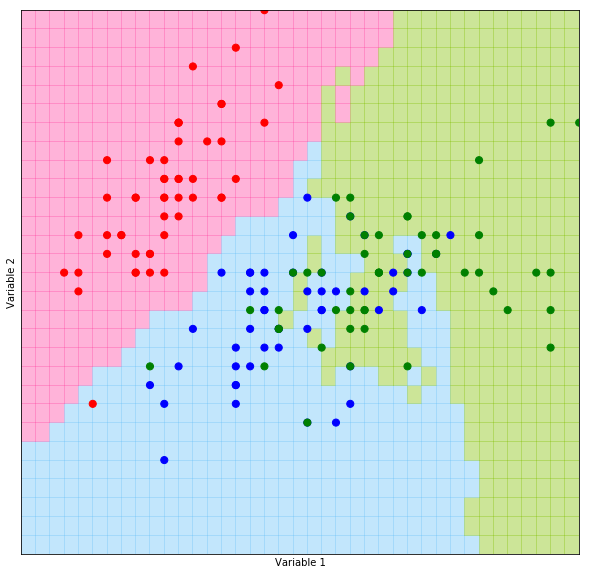

In [31]:
k=5
filename="iris_grid.pdf"
limits = (4, 8, 1.5, 4.5)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

> Compare self-made kNN classifier VS `sklearn.neighbors.Kneighbors` classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [33]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [34]:
print(100 * np.mean(sk_predictions == my_predictions), "%" )

96.0 %


In [35]:
print(100 * np.mean(sk_predictions == outcomes), "%" )
print(100 * np.mean(my_predictions == outcomes), "%" )

83.33333333333334 %
84.66666666666667 %
